In [75]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import psycopg2
from dotenv import load_dotenv
import os
import joblib
import matplotlib.pyplot as plt

In [5]:

model = joblib.load('modelo/modelo.pkl')

print(model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=[5],
                               random_state=352))])


c:\Users\gutil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\gutil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\gutil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimat

In [6]:

Xnew = [[120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000]]
ypred = model.predict(Xnew)  
print(ypred)

[0.]


In [7]:
env_path="C:\\Users\\gutil\\OneDrive - Universidad de los andes\\Escritorio\\Ingenieria Industrial\\2024-01\\Analitica Computacional Para la Toma de Decisiones\\Clases\\Clase 11\\actd_clase21\\actd_clase21\\env\\app.env"
# load env 
load_dotenv(dotenv_path=env_path)
# extract env variables
USER=os.getenv('USER')
PASSWORD=os.getenv('PASSWORD')
HOST=os.getenv('HOST')
PORT=os.getenv('PORT')
DBNAME=os.getenv('DBNAME')

#connect to DB
print(DBNAME)
print(USER)
print(PASSWORD)
print(HOST)
print(PORT)


world
postgres
actd2024
actd24.c2ejf18x6i7a.us-east-1.rds.amazonaws.com
5432


In [21]:
# Importar librerias

import psycopg2
import pandas.io.sql as sqlio

In [22]:
# Codigo de conexion

engine = psycopg2.connect(
    dbname="prod",
    user="postgres",
    password="nucita123",
    host="project2.cb8aki4qgnkm.us-east-1.rds.amazonaws.com",
    port='5432'
)

In [23]:
cursor = engine.cursor()

In [24]:
# Tablas incluidas dentro del archivo world.sql

query = """
SELECT * 
FROM pg_catalog.pg_tables 
WHERE schemaname='public';"""
cursor.execute(query)
result = cursor.fetchall()
result

[('public', 'prodq1', 'postgres', None, False, False, False, False)]

In [25]:
# Primera tabla dentro del archivo

query = """
SELECT * 
FROM prodq1;"""
df = sqlio.read_sql_query(query, engine)
df

C:\Users\gutil\AppData\Local\Temp\ipykernel_33528\600194438.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(query, engine)


,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [106]:

query = """
SELECT
    education,
    SUM(CASE WHEN default_payment_next_month = 1 THEN 1 ELSE 0 END) / CAST(COUNT(*) AS FLOAT) * 100 AS Default_Percentage,
    SUM(CASE WHEN default_payment_next_month = 0 THEN 1 ELSE 0 END) / CAST(COUNT(*) AS FLOAT) * 100 AS No_Default_Percentage
FROM
    prodq1
WHERE
    education in (1,2,3,4)
GROUP BY
    education
ORDER BY
    education ASC;

"""
df = sqlio.read_sql_query(query, engine)
df


C:\Users\gutil\AppData\Local\Temp\ipykernel_33528\4190725624.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(query, engine)


,education,default_percentage,no_default_percentage
0,1,19.234766,80.765234
1,2,23.734854,76.265146
2,3,25.157616,74.842384
3,4,5.691057,94.308943


In [120]:
cat = df.columns[0]

if cat == 'education':
    x = ['Graduate School', 'University', 'High School', 'Others']

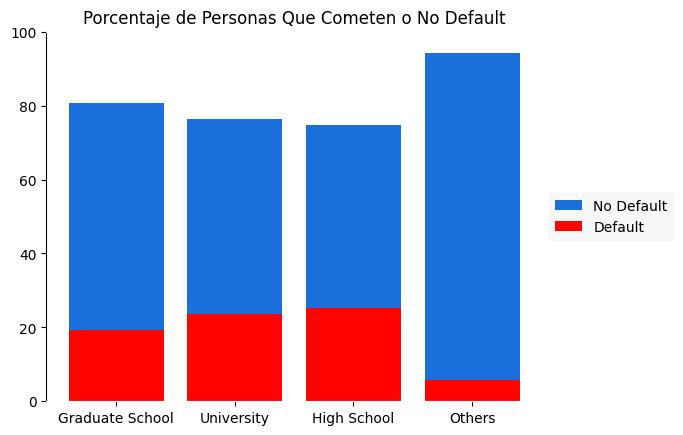

In [157]:
#######################

y1 = (df['default_percentage']).tolist()
y2 = (df['no_default_percentage']).tolist()

plt.bar(x, y2, color = (27/255, 111/255, 218/255))

plt.bar(x, y1, color = (255/255, 3/255, 0/255))

lista_combinada = ['No Default', 'Default']

plt.legend(title="", labels=lista_combinada, loc="center left", bbox_to_anchor=(1, 0.5), frameon = True, facecolor = 'whitesmoke', edgecolor = 'whitesmoke')

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')

plt.title('Porcentaje de Personas Que Cometen o No Default')
plt.ylim(0,100)

plt.show()



In [67]:
#################
print(df['pagadores'])

0       0
1    2036
2    3330
3    1237
4       7
5      18
6       8
Name: pagadores, dtype: int64


In [68]:
###########################
query = """
SELECT
    education,
    COUNT(CASE WHEN default_payment_next_month = 1 THEN 1 END) AS Default,
    COUNT(CASE WHEN default_payment_next_month = 0 THEN 1 END) AS No_Default
FROM
    prodq1
GROUP BY
    education
ORDER BY education ASC
    ;

"""
cursor.execute(query)
result = cursor.fetchall()
print(result)


[(0, 0, 14), (1, 2036, 8549), (2, 3330, 10700), (3, 1237, 3680), (4, 7, 116), (5, 18, 262), (6, 8, 43)]


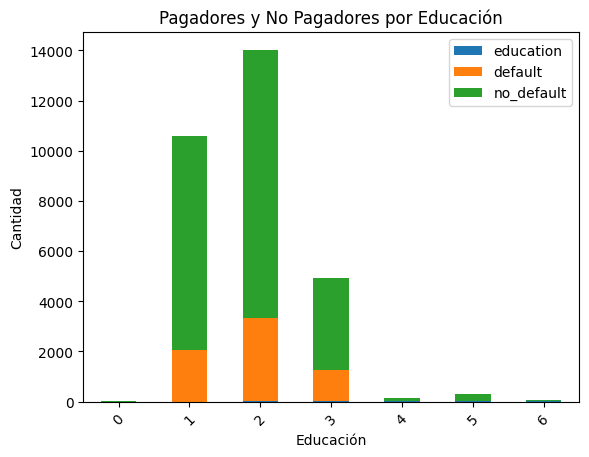

In [70]:
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame que contiene los resultados de tu consulta SQL
# Asegúrate de que la columna 'education' sea el índice de tu DataFrame
# y que 'Pagadores' y 'No_Pagadores' sean las otras dos columnas

# Crear la gráfica de barras
df.plot(kind='bar', stacked=True)

# Personalizar la gráfica
plt.title('Pagadores y No Pagadores por Educación')
plt.xlabel('Educación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la gráfica
plt.show()

